In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sympy.stats.sampling.sample_numpy import numpy

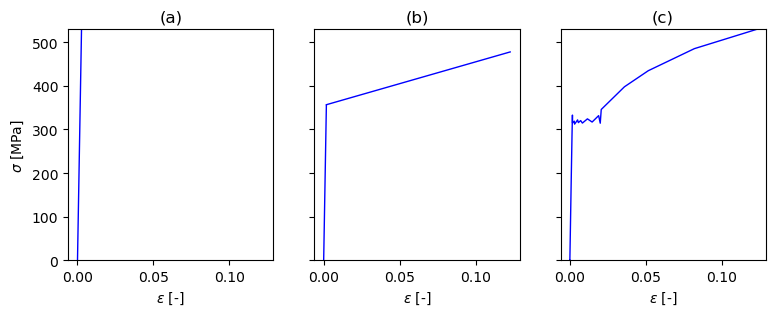

In [75]:
# Figure 1
stress_strain = np.loadtxt('other/LP1_Specimen_1_processed_data.csv', delimiter=',', skiprows=1)[:, 2:]

e_min = stress_strain[:, 0].min()
e_max = stress_strain[:, 0].max()
f_min = stress_strain[:, 1].min()
f_max = stress_strain[:, 1].max()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax1.plot(np.linspace(e_min, e_max), np.linspace(e_min, e_max) * 200e3, c='b', lw=1)
ax2.plot(np.linspace(e_min, 0.001775), np.linspace(e_min, 0.001775) * 200e3, c='b', lw=1)
ax2.plot(np.linspace(0.001775, e_max), 0.001775 * 200e3 + np.linspace(0.001775, e_max) * 1e3, c='b', lw=1)
ax3.plot(stress_strain[:, 0], stress_strain[:, 1], c='b', lw=1)

ax1.set_ylim(0, f_max)

ax1.set_ylabel("$\sigma$ [MPa]")
ax1.set_xlabel("$\epsilon$ [-]")
ax2.set_xlabel("$\epsilon$ [-]")
ax3.set_xlabel("$\epsilon$ [-]")

ax1.set_title("(a)")
ax2.set_title("(b)")
ax3.set_title("(c)")

plt.savefig('figures/strain_stress_graph.pdf', bbox_inches='tight', )

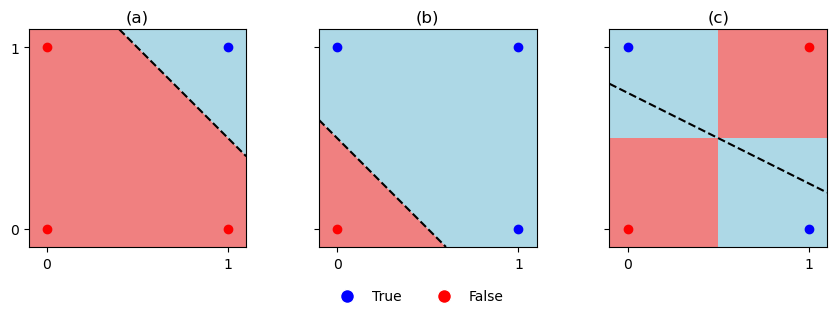

In [55]:
# AND OR XOR figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)

# Create scatter plots with labels
ax1.scatter([1], [1], c='blue', label='True')
ax1.scatter([0, 0, 1], [0, 1, 0], c='red', label='False')
ax1.axline([1, .5], slope=-1, ls='--', c='black')
ax1.add_patch(plt.Rectangle((1.5, 0.), width=10, height=10, angle=45, color='lightblue', lw=0, zorder=-1))
ax1.add_patch(plt.Rectangle((1.5, 0.), width=-10, height=10, angle=45, color='lightcoral', lw=0, zorder=-1))

ax2.scatter([0, 1, 1], [1, 0, 1], c='blue', label='True')
ax2.scatter([0], [0], c='red', label='False')
ax2.axline([0, .5], slope=-1, ls='--', c='black')
ax2.add_patch(plt.Rectangle((1, -.5), width=10, height=10, angle=45, color='lightblue', lw=0, zorder=-1))
ax2.add_patch(plt.Rectangle((1, -.5), width=-10, height=10, angle=45, color='lightcoral', lw=0, zorder=-1))

ax3.scatter([0, 1], [1, 0], c='blue', label='True')
ax3.scatter([0, 1], [0, 1], c='red', label='False')
ax3.axline([.5, .5], slope=-.5, ls='--', c='black')
ax3.add_patch(plt.Rectangle((.5, .5), width=-10, height=10, angle=0, color='lightblue', lw=0, zorder=-1))
ax3.add_patch(plt.Rectangle((.5, .5), width=10, height=10, angle=0, color='lightcoral', lw=0, zorder=-1))
ax3.add_patch(plt.Rectangle((.5, .5), width=10, height=-10, angle=0, color='lightblue', lw=0, zorder=-1))
ax3.add_patch(plt.Rectangle((.5, .5), width=-10, height=-10, angle=0, color='lightcoral', lw=0, zorder=-1))

ax1.set_title("(a)")
ax2.set_title("(b)")
ax3.set_title("(c)")

# Set the same limits for all axes
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlim(-.1, 1.1)

    # Set ticks to only show 0 and 1
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

    # Make axes equal (square)
    ax.set_aspect('equal')

# Add a single legend for the entire figure
# Create custom handles for the legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='True'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='False')
]

# Place the legend outside the subplots
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.1),
           ncol=2, frameon=False)

# Add more space at the bottom for the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make space for the legend at the bottom

plt.savefig('figures/perceptron problem.pdf', bbox_inches='tight', )